Found 4060 images belonging to 25 classes.
Found 1153 images belonging to 25 classes.
Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 541s 4s/step - accuracy: 0.3931 - loss: 2.4149 - val_accuracy: 0.6667 - val_loss: 1.0795
Epoch 2/20
  1/126 ━━━━━━━━━━━━━━━━━━━━ 4:44 2s/step - accuracy: 0.7500 - loss: 1.0145

C:\Users\arshi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7500 - loss: 1.0145 - val_accuracy: 1.0000 - val_loss: 1.2798
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 501s 4s/step - accuracy: 0.6616 - loss: 1.1160 - val_accuracy: 0.7274 - val_loss: 0.9252
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6875 - loss: 1.2834 - val_accuracy: 1.0000 - val_loss: 0.1931
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.7072 - loss: 0.9851 - val_accuracy: 0.7153 - val_loss: 0.8756
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6250 - loss: 1.1684 - val_accuracy: 1.0000 - val_loss: 0.0875
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 512s 4s/step - accuracy: 0.7226 - loss: 0.9263 - val_accuracy: 0.7630 - val_loss: 0.7715
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6875 - loss: 1.0807 - val_accuracy: 1.0000 - val_loss: 0.6454
Epoch 9/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.7387 - loss: 0.8281 - val_accuracy: 0.7717 - 

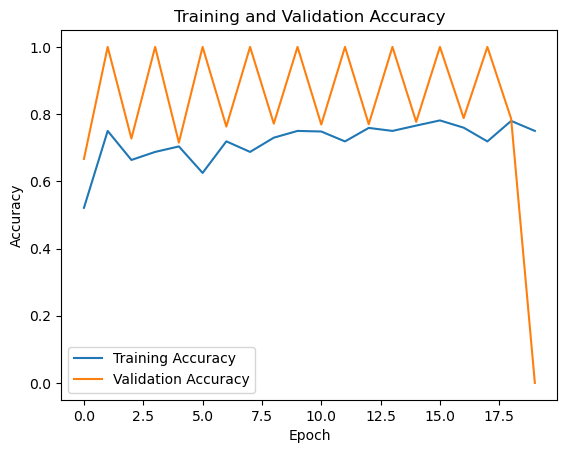

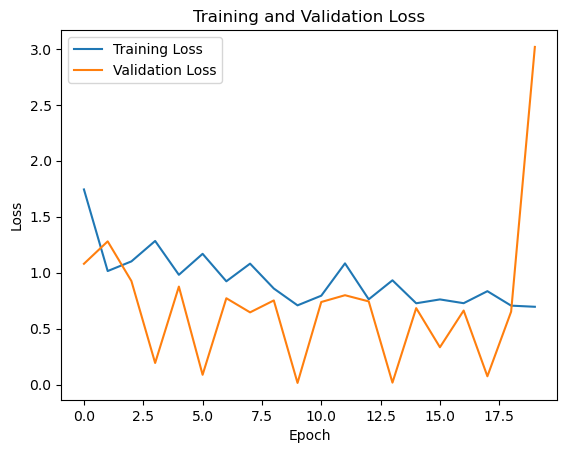

In [51]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

# Define directory paths for training and validation data
train_dir = "data_waste/train"
val_dir = "data_waste/valid"

# Data preprocessing and augmentation for training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

# Number of classes for the output layer
num_classes = len(train_generator.class_indices)

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained features
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
)

# Save the model for future use
model.save("inception_v3_model.h5")

# Optionally, plot the training history
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


### Regularization refers to techniques used to prevent overfitting
### Randomly sets a fraction of neurons to zero during training to prevent co-dependencies among neurons.
### helps reduce internal covariate shift and stabilizes training.
### Definition: Classification layers are the final layers in a neural network designed to map the learned features to the desired output classes.
### Normalization techniques ensure stable and efficient training by scaling inputs, activations, or weights to maintain consistent ranges.

In [54]:
from tensorflow.keras.utils import load_img, img_to_array
image = load_img('data_waste/test/Crushed bottles_crushed_bottle (27).jpeg', target_size=(224, 224))  # Resize to match model input
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize pixel values (if needed)


In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load the saved model
model = load_model('inception_v3_model.h5')

# Path to the test image
image_path = 'data_waste/test/Crushed bottles_crushed_bottle (27).jpeg'

# Load and preprocess the image
image = load_img(image_path, target_size=(224, 224))  # Adjust size as per model input
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)  # Get the index of the highest probability class

# Display the prediction
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: 0


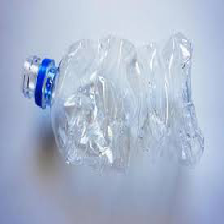

In [57]:
image

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Directory paths
val_dir = "data_waste/valid"

# Load the saved model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Validation data preprocessing
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Ensures data order for confusion matrix computation
)

# Generate predictions on the validation dataset
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Classification report
target_names = list(val_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes, target_names=target_names))


Found 1153 images belonging to 25 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step
Confusion Matrix:
 [[ 11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   1   1   0]
 [  0   7   0   0   0   0   0   0   1   0   0   0   0   0   1   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   8   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   1   0 105   0   0   0   0   0   1   0   1   2   0   0   5   1   0
    4   0   0   0  10   1   2]
 [  0   0   0   1   3   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   1   1   0   1]
 [  0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   5   0   1   4   0   0   0   0   0   0   0   0   2   0   1
    1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  10   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7   0   0   0   0   0   0   0   1   0
    0   1   0   1   0   0  

### For "Crushed bottles":
Precision: 0.92 — 92% of predicted "Crushed bottles" were actually correct.
Recall: 0.79 — 79% of actual "Crushed bottles" were correctly identified.
F1-Score: 0.85 — A balanced metric combining precision and recall.
Support: 14 — There are 14 actual instances of "Crushed bottles" in the dataset.

Found 1153 images belonging to 25 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step


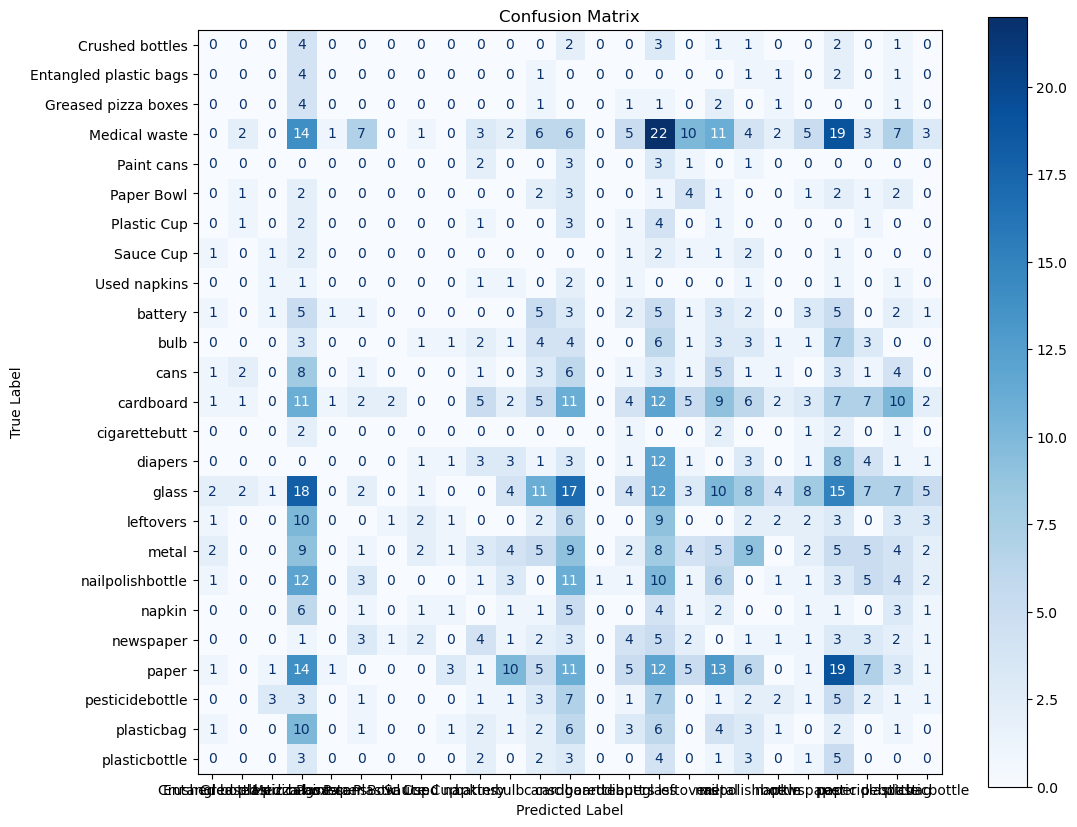

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Directory for validation data
val_dir = "data_waste/valid"

# Prepare the validation data generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True  
)

# Get predictions and true labels
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
labels = list(val_generator.class_indices.keys())  # Get class labels

# Plot the confusion matrix
plt.figure(figsize=(12, 10))  # Adjust the size as needed (width=12, height=10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())  # Use current axes
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Found 1153 images belonging to 25 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step


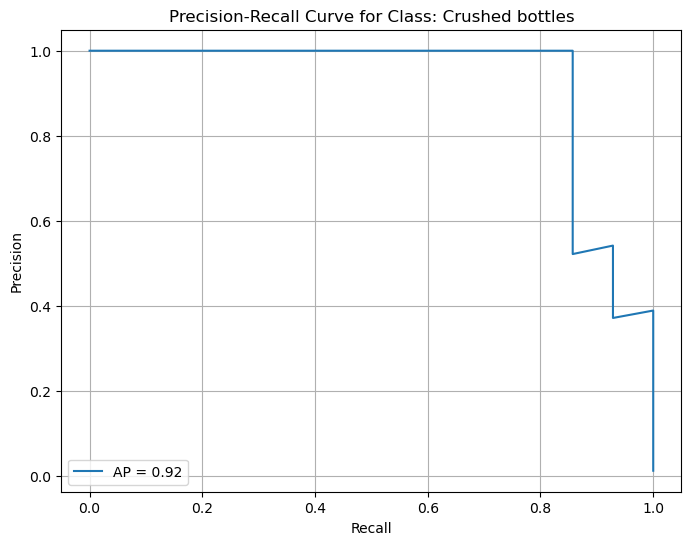

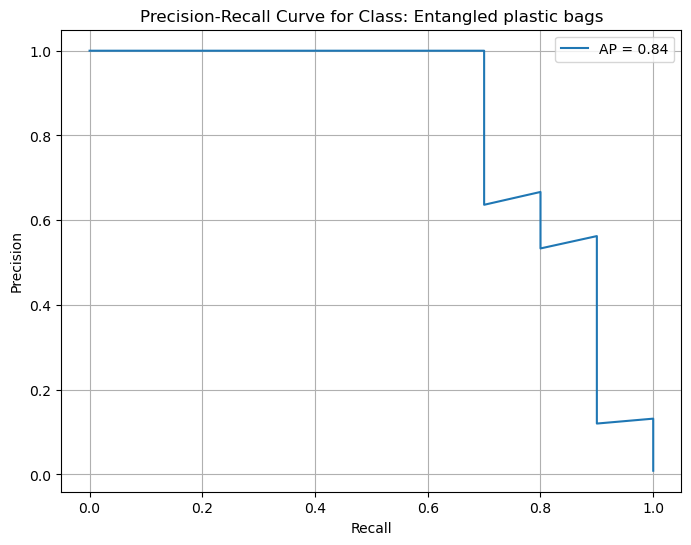

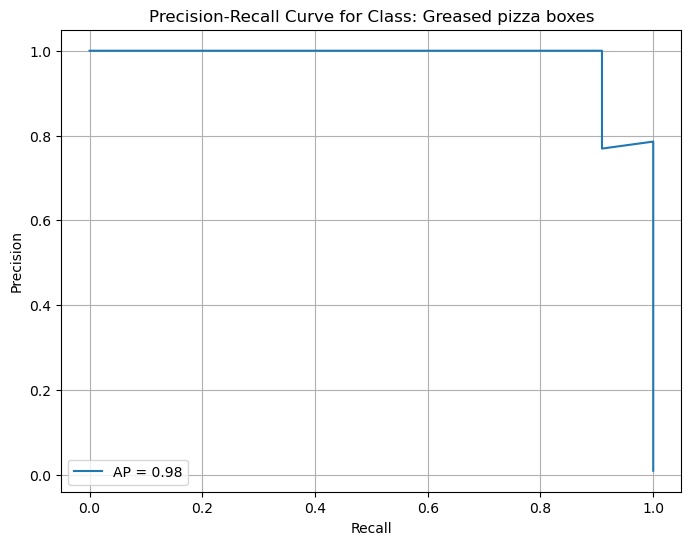

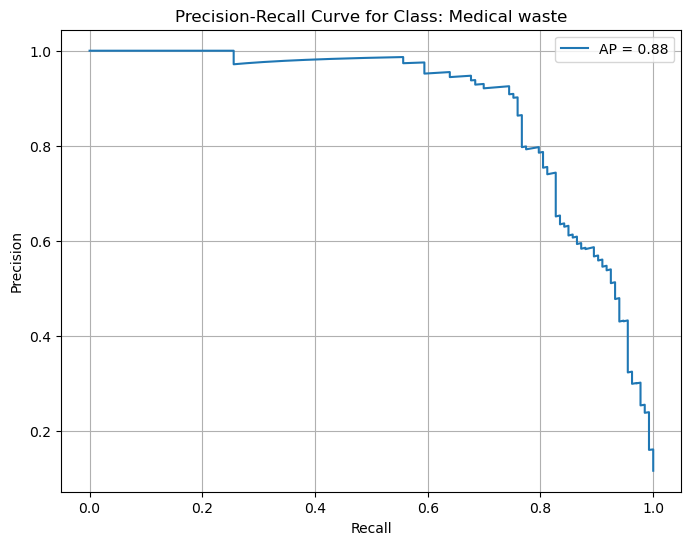

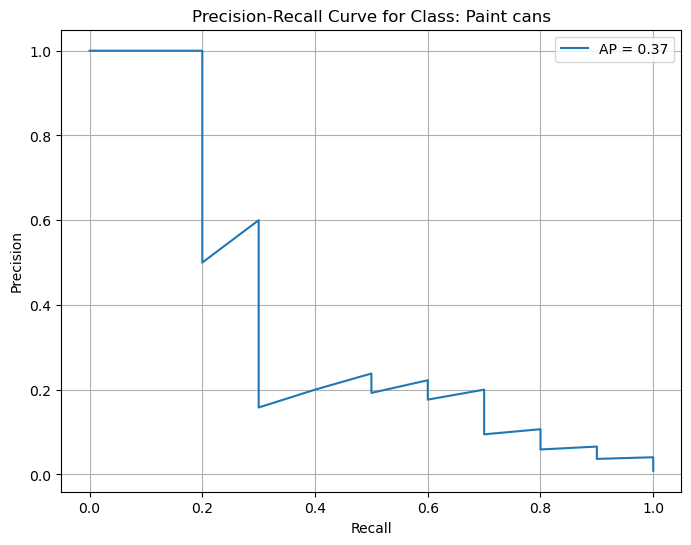

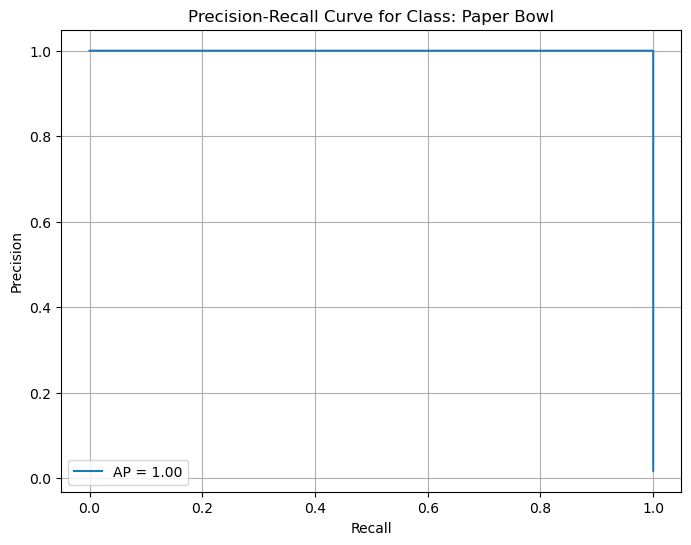

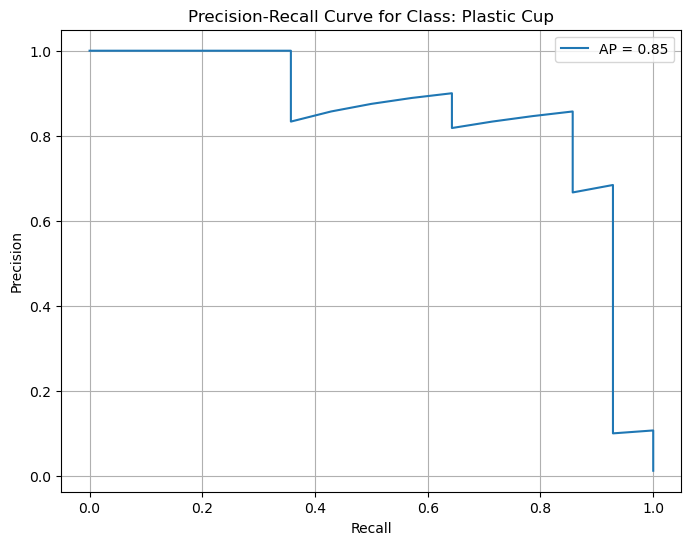

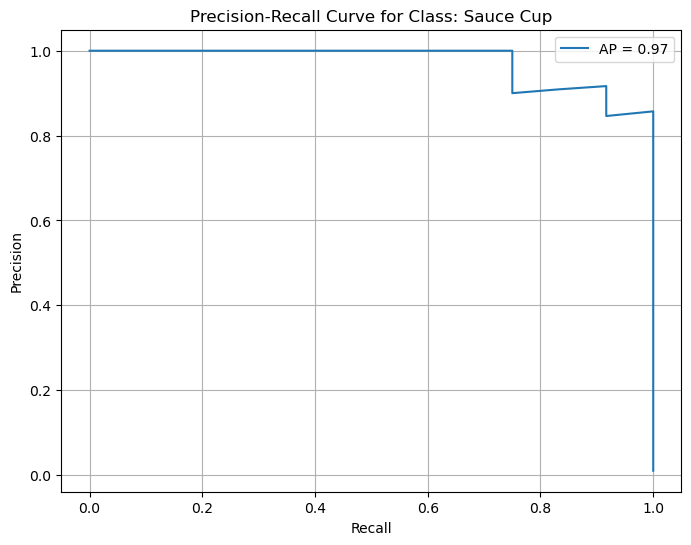

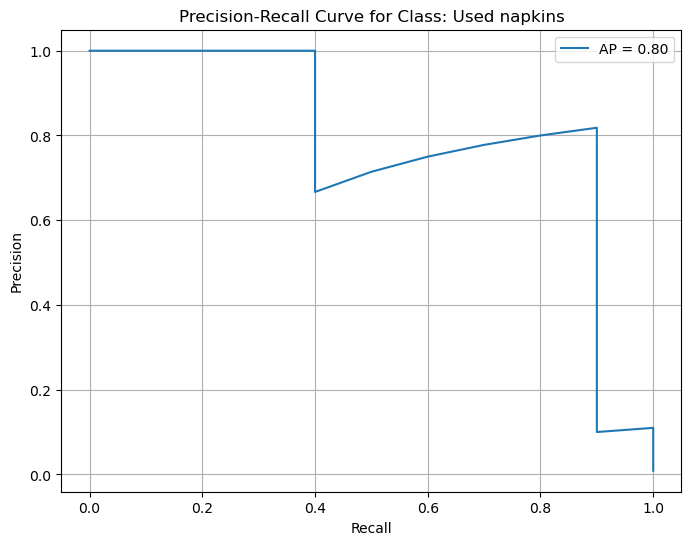

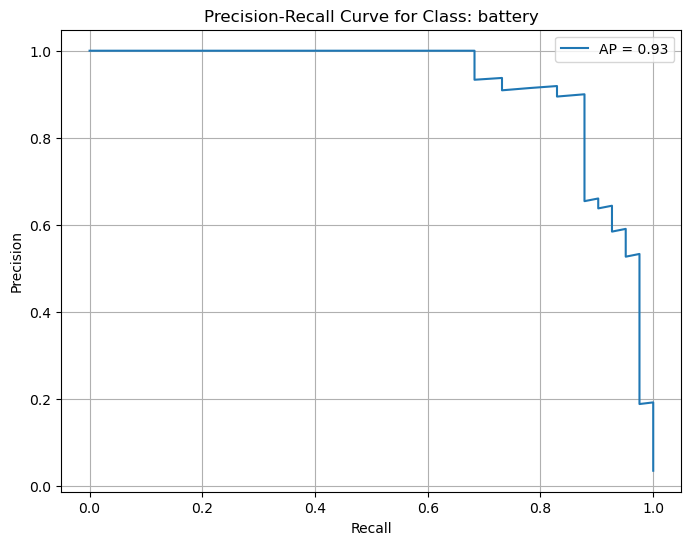

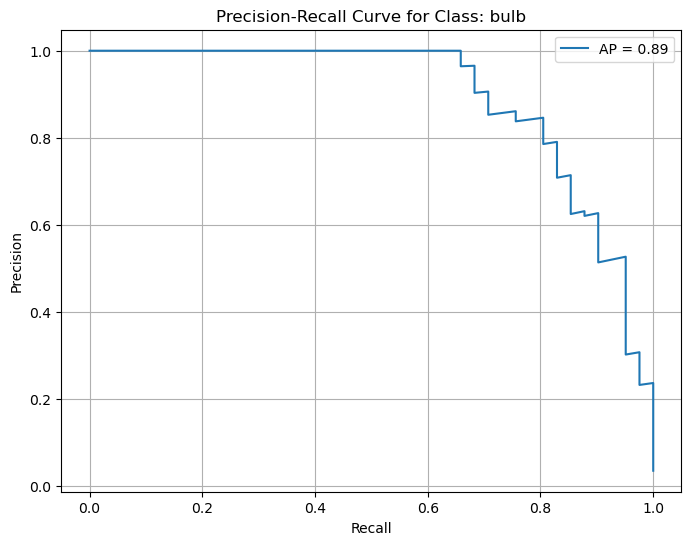

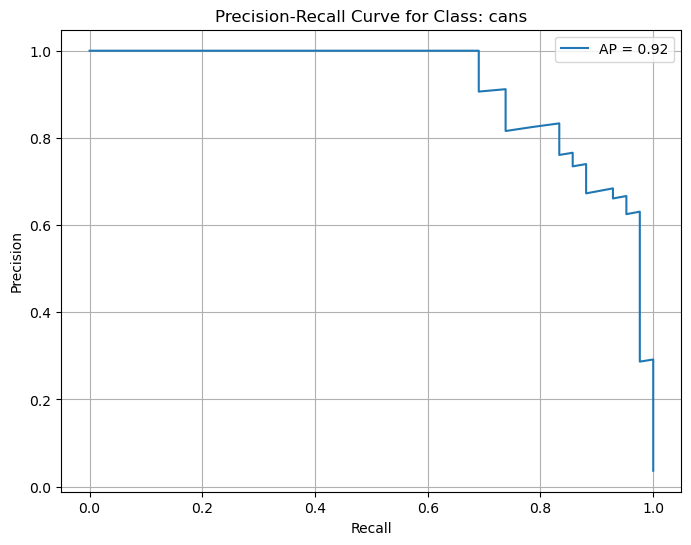

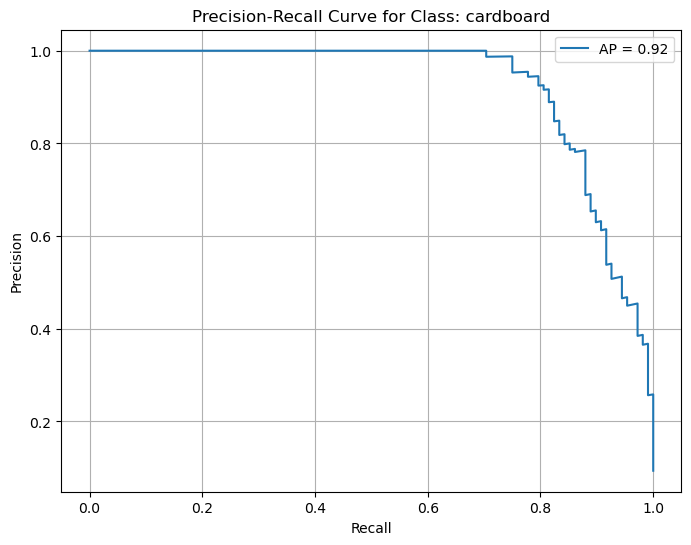

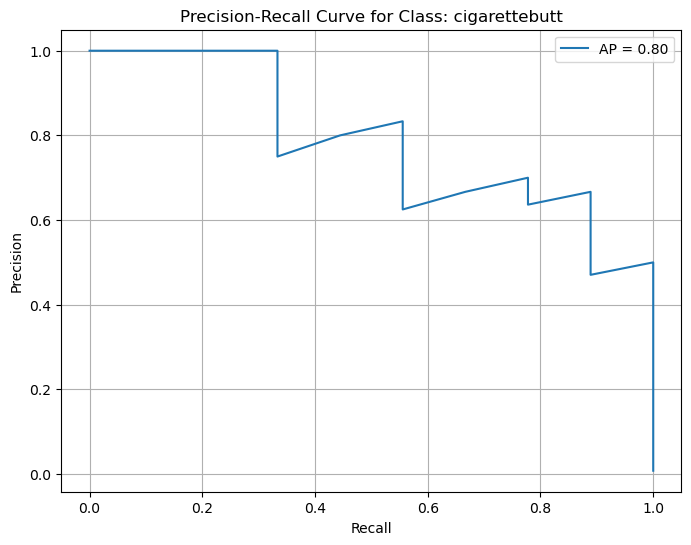

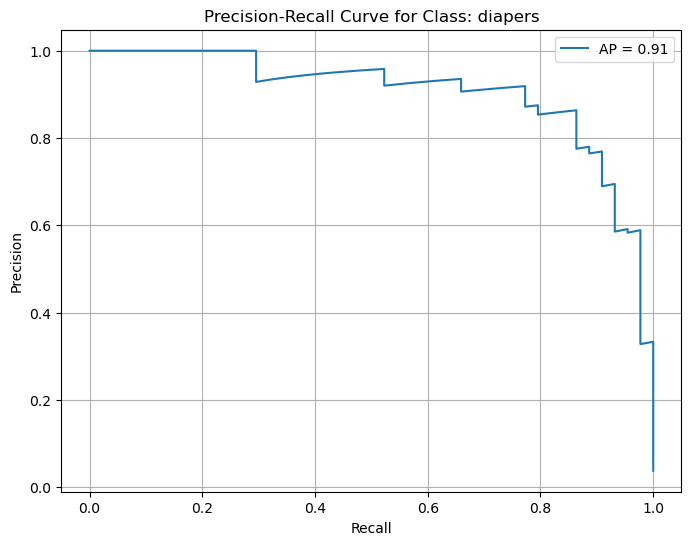

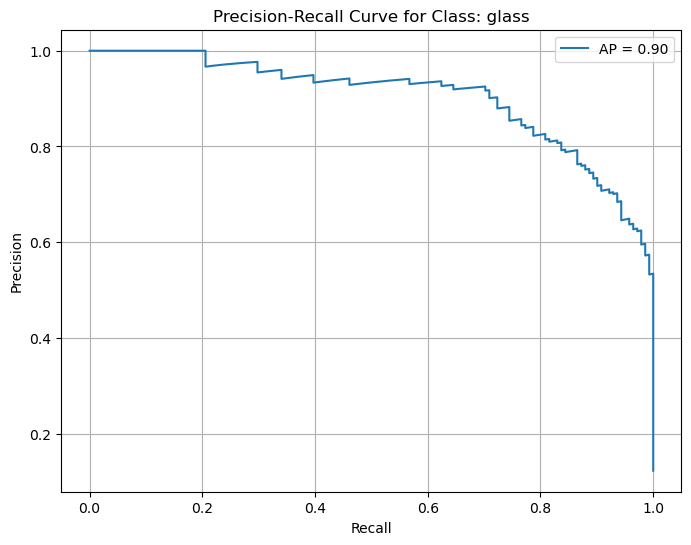

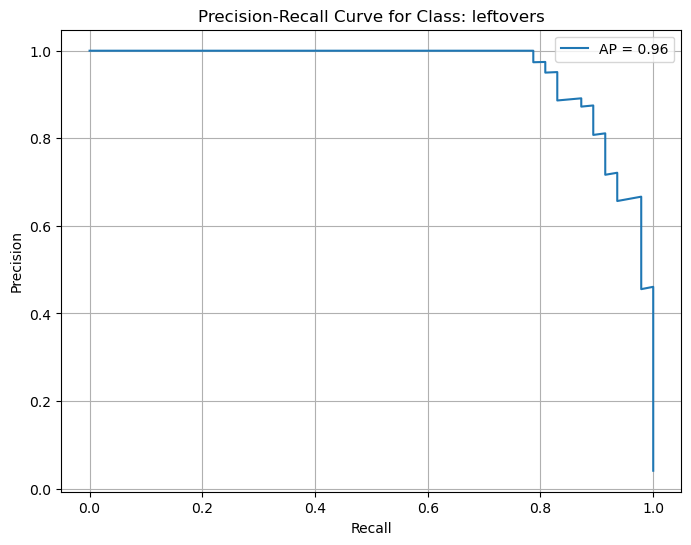

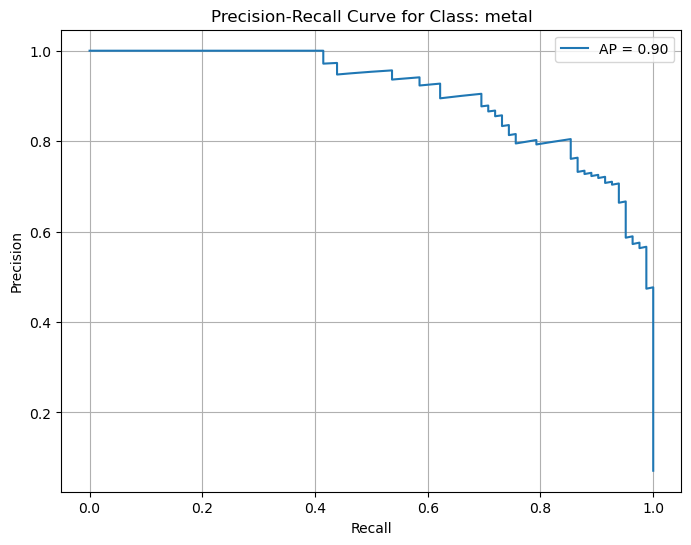

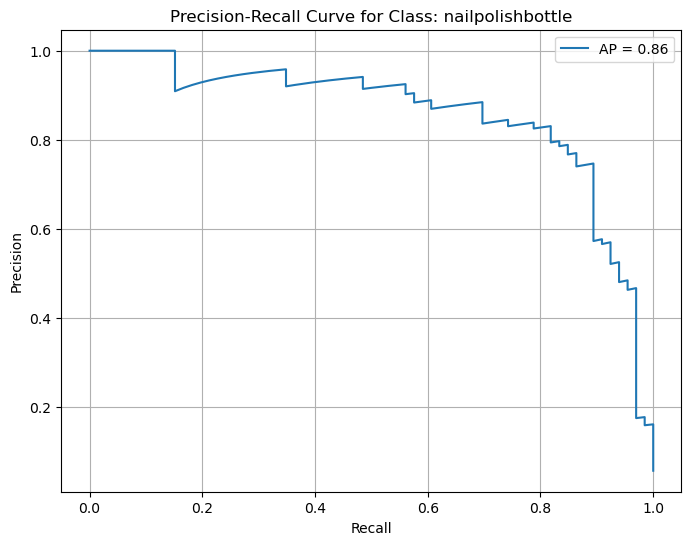

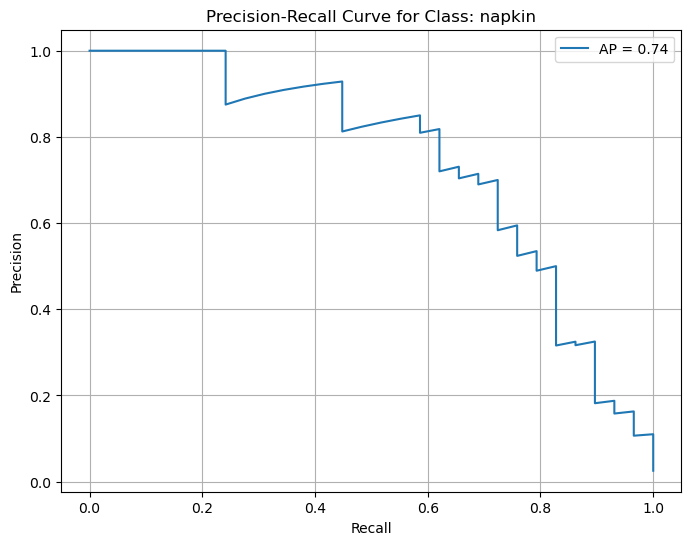

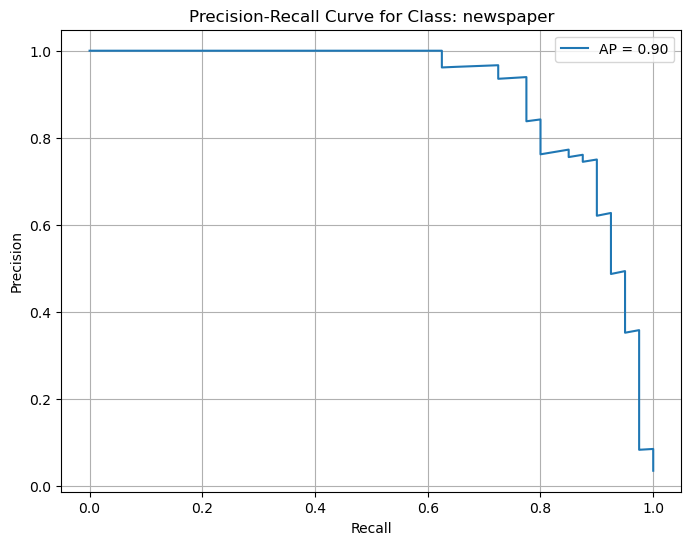

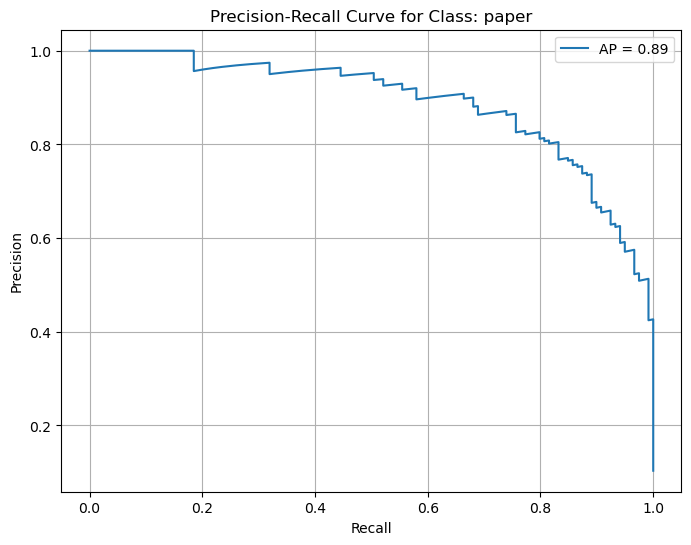

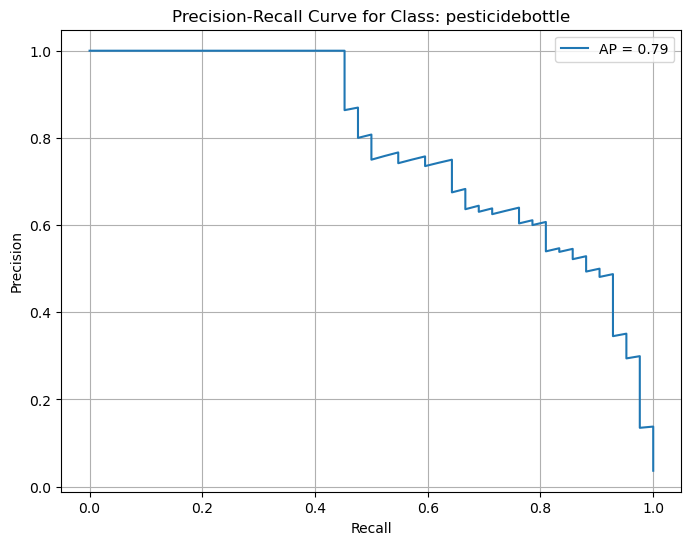

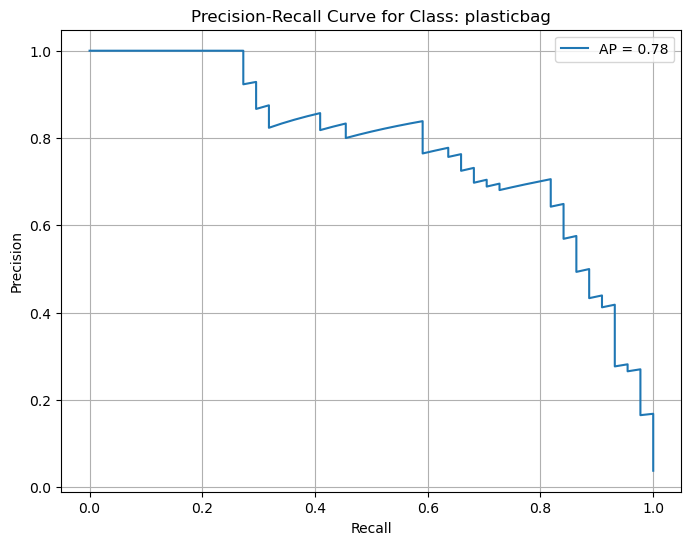

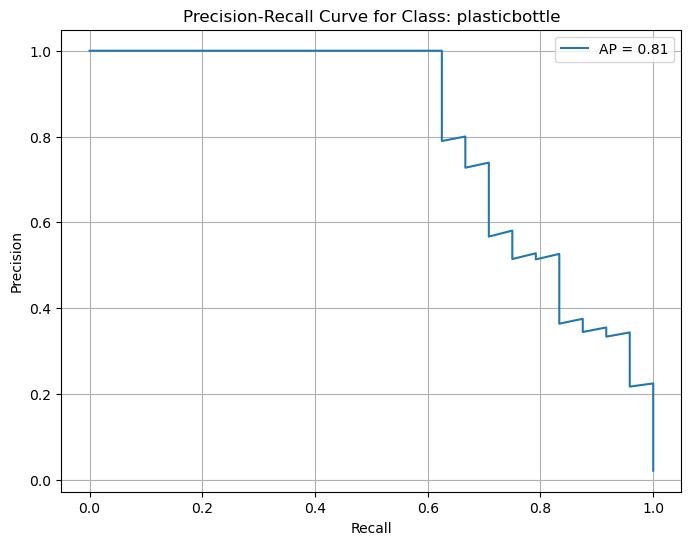

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import label_binarize

# Load the trained model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Directory for validation data
val_dir = "data_waste/valid"

# Prepare the validation data generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",  # Use categorical for multi-class classification
    shuffle=False
)

# Get predictions and true labels
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)

# Binarize true labels for multi-class precision-recall curve computation
true_classes = val_generator.classes
num_classes = len(val_generator.class_indices)  # Number of classes
true_classes_binarized = label_binarize(true_classes, classes=list(range(num_classes)))

# Generate Precision-Recall curves for each class
for i, class_name in enumerate(val_generator.class_indices.keys()):
    precision, recall, _ = precision_recall_curve(true_classes_binarized[:, i], predictions[:, i])
    average_precision = average_precision_score(true_classes_binarized[:, i], predictions[:, i])

    # Plot each class's Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for Class: {class_name}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
